In [1]:
import numpy as np
import open3d as o3d
import math
import matplotlib.pyplot as plt
from matplotlib import cm

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
class PointCloud:
    def __init__(self, filename):
        self.filename = filename
        self.data = np.reshape(np.fromfile(self.filename, '<f4'), (-1, 4))
        self.points = self.data[:, :-1]
        self.intensity = self.data[:, -1]
    
    def create_vis(self,o3d_pc):
        vis = o3d.visualization.Visualizer()
        vis.create_window(
            window_name='Carla Lidar',
            width=960,
            height=540,
            left=480,
            top=270)
        vis.get_render_option().background_color = [0.05, 0.05, 0.05]
        vis.get_render_option().point_size = 1
        #vis.get_render_option().show_coordinate_frame = True
        vis.add_geometry(o3d_pc)
        vis.run()  
        
    #visualizar nube de puntos, coloreada por defecto
    def visualize(self):
        o3d_pc = o3d.geometry.PointCloud()
        o3d_pc.points = o3d.utility.Vector3dVector(self.points)
        
        VIRIDIS = np.array(cm.get_cmap('plasma').colors)
        VID_RANGE = np.linspace(0.0, 1.0, VIRIDIS.shape[0])
        int_color = np.c_[
            np.interp(self.intensity, VID_RANGE, VIRIDIS[:, 0]),
            np.interp(self.intensity, VID_RANGE, VIRIDIS[:, 1]),
            np.interp(self.intensity, VID_RANGE, VIRIDIS[:, 2])]
        
        o3d_pc.colors = o3d.utility.Vector3dVector(int_color)

        self.create_vis(o3d_pc)

    #retorna los indices de los puntos con una intesidad mayor a treshold
    def index_points_intensity_greater_than(self, threshold):
        indexes = []
        for i in range(len(self.points)):
            if self.intensity[i] > threshold:
                #points.append(self.points[i])
                indexes.append(i)
        return indexes
    
    #retorna los indices de los puntos (x,y,z) de parametro,
    def indexes_from_points(self, points):
        indexes = []
        for j in range(len(points)):
            for i in range(len(self.points)):
                if np.isclose(self.points[i],points[j]).all():
                    indexes.append(i)
                    break
        return indexes
    
    #retorna los valores (x,y,z) de los puntos de los indices de parametro
    def points_from_indexes(self, indexes):
        return self.points[indexes]
    
    def points_w_i_from_indexes(self, indexes):
        return self.data[indexes]
    
    #visualizar nube de puntos, coloreando los puntos seleccionados por los indices
    def visualize_selected_points_index(self, indexes):
        colors = []
        for i in range(len(self.points)):
            if i in indexes:
                colors.append((1.0,0.0,0.0))
            else:
                colors.append((0.0,1.0,0.0)) 
                
        o3d_pc = o3d.geometry.PointCloud()
        o3d_pc.points = o3d.utility.Vector3dVector(self.points)
        o3d_pc.colors = o3d.utility.Vector3dVector(colors)
        o3d.visualization.draw_geometries([o3d_pc]) 
        
    def visualize_selected_points_index_by_i(self, indexes):
        colors = []
        for i in range(len(self.points)):
            if i in indexes:
                red=self.intensity[i]
                green=1.-red
                colors.append((red,green,0.0))
            else:
                colors.append((0.0,0.0,1.0)) 
                
        o3d_pc = o3d.geometry.PointCloud()
        o3d_pc.points = o3d.utility.Vector3dVector(self.points)
        o3d_pc.colors = o3d.utility.Vector3dVector(colors)
        o3d.visualization.draw_geometries([o3d_pc]) 
        
    #visualizar la nube con los ejes x,y o z resaltados en el valor especificado
    def visualize_selected_axis(self,axis,x=0,y=0,z=0,delta=0.1):
        colors = []
        for i in range(len(self.points)):
            if self.points[i][0] > (x-delta) and self.points[i][0] < (x+delta) and 'x' in axis:
                colors.append((0.0,1.0,0.0)) #verde
            elif self.points[i][1] > (y-delta) and self.points[i][1] < (y+delta) and 'y' in axis:
                colors.append((1.0,0.0,0.0)) #rojo
            elif self.points[i][2] > (z-delta) and self.points[i][2] < (z+delta) and 'z' in axis:
                colors.append((1.0,1.0,0.0)) #amarrill0
            else:
                colors.append((0.0,0.0,1.0)) #azul
                
        o3d_pc = o3d.geometry.PointCloud()
        o3d_pc.points = o3d.utility.Vector3dVector(self.points)
        o3d_pc.colors = o3d.utility.Vector3dVector(colors)
        self.create_vis(o3d_pc)
        #o3d.visualization.draw_geometries([o3d_pc])
        
    def index_points_x_axis_value(self,value,delta=0.05):
        indexes = []
        for i in range(len(self.points)):
            if self.points[i][0] > (value-delta) and self.points[i][0] < (value+delta):
                indexes.append(i)
        return indexes
    
    def index_points_y_axis_value(self,value,delta=0.05):
        indexes = []
        for i in range(len(self.points)):
            if self.points[i][1] > (value-delta) and self.points[i][1] < (value+delta):
                indexes.append(i)
        return indexes
    

In [ ]:
#point_cloud = PointCloud('/home/gaston/Documents/Kitti/training/velodyne/000008.bin')
point_cloud = PointCloud('/home/gaston/Documents/CarlaLidarData/point_clouds/000229.bin')
point_cloud.visualize()

In [6]:
print(point_cloud.data)

[[-2.4611666e+01 -9.0825434e+00  7.0293956e+00  9.0619010e-01]
 [-2.3400280e+01 -9.0653172e+00  6.7241516e+00  3.4893104e-01]
 [-2.2289150e+01 -9.0494242e+00  6.4458213e+00  4.3284079e-01]
 ...
 [-1.4527968e+00  1.8779723e-01 -6.8308741e-01  4.2261857e-01]
 [-1.4489467e+00  1.4013217e-01 -6.7880851e-01  4.2261881e-01]
 [-1.0942053e+00  1.7584693e-02 -5.1030302e-01  4.2261881e-01]]


In [37]:
point_cloud.visualize_selected_axis('xy',2.,0.)

In [15]:
indexes_points_y_0 = point_cloud.index_points_y_axis_value(0.)
indexes_points_y_0_positives = []

for i in range(len(indexes_points_y_0)):
    if point_cloud.points[indexes_points_y_0[i]][0] > 0. :
        indexes_points_y_0_positives.append(indexes_points_y_0[i])
        
point_cloud.visualize_selected_points_index(indexes_points_y_0_positives)
#point_cloud.visualize_selected_points_index_by_i(indexes_points_y_0)

In [16]:
#points_y_0 = point_cloud.points_w_i_from_indexes(indexes_points_y_0)
points_y_0 = point_cloud.points_w_i_from_indexes(indexes_points_y_0_positives)
print(points_y_0)


[[ 6.3579e+01  3.7000e-02  4.0700e-01  4.6000e-01]
 [ 6.3526e+01  1.3000e-02 -2.9500e-01  0.0000e+00]
 [ 4.4196e+01 -4.9000e-02 -1.2100e+00  0.0000e+00]
 [ 3.8313e+01  4.2000e-02 -1.2730e+00  0.0000e+00]
 [ 3.4480e+01  1.0000e-03 -1.3300e+00  0.0000e+00]
 [ 3.1326e+01  4.3000e-02 -1.3690e+00  0.0000e+00]
 [ 2.8722e+01  4.9000e-02 -1.4210e+00  0.0000e+00]
 [ 2.8724e+01 -4.2000e-02 -1.4210e+00  0.0000e+00]
 [ 2.6640e+01 -9.0000e-03 -1.4450e+00  0.0000e+00]
 [ 2.4383e+01  7.0000e-03 -1.4760e+00  9.0000e-02]
 [ 2.3023e+01  2.2000e-02 -1.4950e+00  2.6000e-01]
 [ 2.1378e+01  3.5000e-02 -1.5140e+00  1.2000e-01]
 [ 2.1388e+01 -3.2000e-02 -1.5150e+00  1.5000e-01]
 [ 2.0159e+01  6.0000e-03 -1.5320e+00  2.0000e-01]
 [ 2.0167e+01  3.8000e-02 -1.5330e+00  3.4000e-01]
 [ 1.9086e+01  2.5000e-02 -1.5530e+00  9.0000e-02]
 [ 1.9086e+01 -3.5000e-02 -1.5530e+00  9.0000e-02]
 [ 1.7905e+01  1.3000e-02 -1.5580e+00  1.9000e-01]
 [ 1.7915e+01 -4.3000e-02 -1.5590e+00  2.2000e-01]
 [ 1.6983e+01  1.2000e-02 -1.57

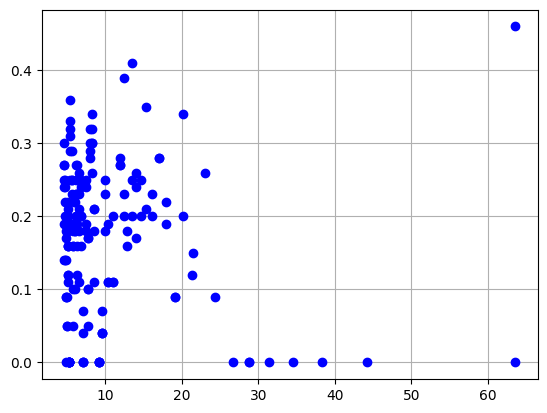

In [21]:
x = points_y_0[:,0]
y = points_y_0[:,3]
#x=[]
#y=[]
plt.plot(x,y, color='none', linestyle='dashed', linewidth=2,
        marker='o', markersize=6, markerfacecolor='blue', markeredgecolor='blue')

plt.grid()
plt.show()

In [11]:
print(points_y_0[:,0])


[ 48.048  47.968  41.125  41.077  36.576  32.788 -50.715 -50.801  32.752
  29.59   29.616 -44.383 -44.476  29.584  27.288 -39.792 -39.838  27.196
  27.228  24.742  24.742 -35.    -35.034  24.708  23.34   23.365 -32.311
 -32.323  23.304  23.314  21.671  21.689 -29.073 -29.099 -29.109  21.661
  20.317  20.325 -26.703 -26.705  20.325  19.128  19.152 -24.788 -24.798
  19.114  19.118  17.911  17.946 -22.934 -22.95  -22.962  17.893  17.913
  16.929  16.931 -21.389 -21.403 -21.413  16.905  16.913  16.085  16.107
 -20.066 -20.069 -20.086  16.075  16.087  15.24   15.24  -18.722 -18.73
 -18.74  -18.754  15.208  15.23   15.236  14.649  14.645 -17.796 -17.8
 -17.812 -17.811  14.615  14.633  14.604  14.009  14.015 -16.916 -16.92
 -16.928 -16.918 -16.912  13.993  14.013  13.427  13.447 -16.133 -16.115
 -16.137 -16.127  13.407  13.427  13.429  12.776  12.779 -15.181 -15.18
 -15.172 -15.188 -15.181  12.764  12.764  12.768  12.426  12.41   12.437
 -14.679 -14.672 -14.703 -14.693 -14.697  12.427  12.398

In [13]:
print(max(y))

0.44
